In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files

In [2]:

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mj2209","key":"8928c3fc1d2c5b9e532a8cee7a6d53ec"}'}

In [3]:
os.environ["KAGGLE_CONFIG_DIR"]="/content"

In [4]:
!kaggle datasets download -dsid321axn/covid-cxr-image-dataset-research

 98% 562M/572M [00:04<00:00, 95.6MB/s]
100% 572M/572M [00:04<00:00, 130MB/s] 


In [5]:
 !unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [6]:
for dirpath,dirname,filename in os.walk("/content/COVID_IEEE"):
  print(f"there are {len(dirname)} directory and {len(filename)} image in '{dirpath}'.")

there are 3 directory and 0 image in '/content/COVID_IEEE'.
there are 0 directory and 668 image in '/content/COVID_IEEE/normal'.
there are 0 directory and 536 image in '/content/COVID_IEEE/covid'.
there are 0 directory and 619 image in '/content/COVID_IEEE/virus'.


In [7]:
data_dir=pathlib.Path("/content/COVID_IEEE")
class_name=np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [8]:
def view_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img,cmap="gray")
  plt.title(target_class)

  return img

['person432_virus_881.jpeg']


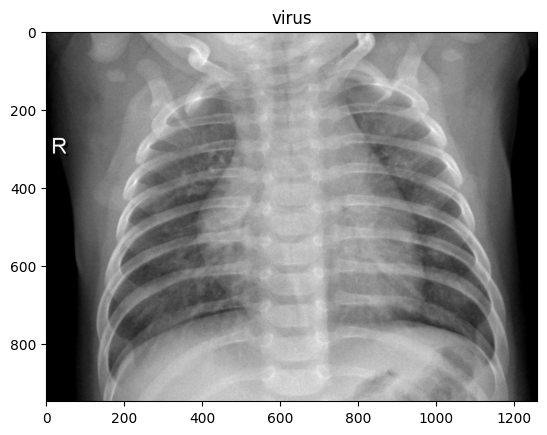

In [9]:
img=view_image("/content/COVID_IEEE/","virus")

['IM-0341-0001.jpeg']


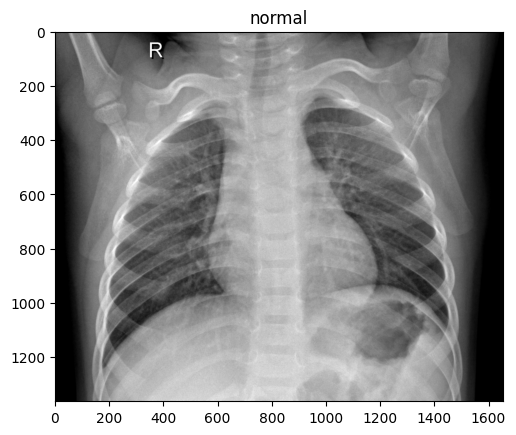

In [10]:
img=view_image("/content/COVID_IEEE/","normal")

['4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg']


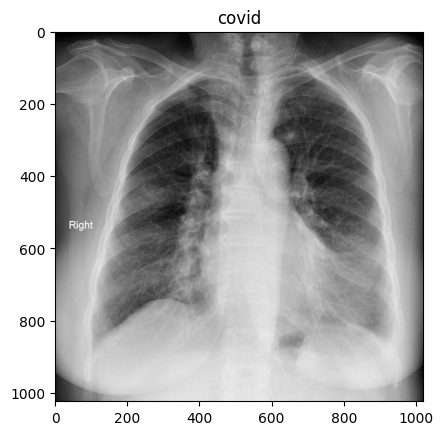

In [11]:
img=view_image("/content/COVID_IEEE/","covid")

In [12]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")

for i in covid:
  image=cv2.imread("/content/COVID_IEEE/covid/"+i)

  image=cv2.resize(image,(224,224))
  data.append(data)
  labels.append(0)

In [13]:
normal=os.listdir("/content/COVID_IEEE/normal/")

for i in normal:
  image=cv2.imread("/content/COVID_IEEE/normal/"+i)

  image=cv2.resize(image,(224,224))
  data.append(data)
  labels.append(1)

In [14]:
virus=os.listdir("/content/COVID_IEEE/virus/")

for i in virus:
  image=cv2.imread("/content/COVID_IEEE/virus/"+i)

  image=cv2.resize(image,(224,224))
  data.append(data)
  labels.append(2)

In [ ]:
img_data=np.array(data)/255.0
img_labels=np.array(labels)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(img_data,img_labels,test_size=0.20,random_state=42)
y_train=tf.keras.utils.to_categorical(y_train,num_classes=3)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=3)

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])